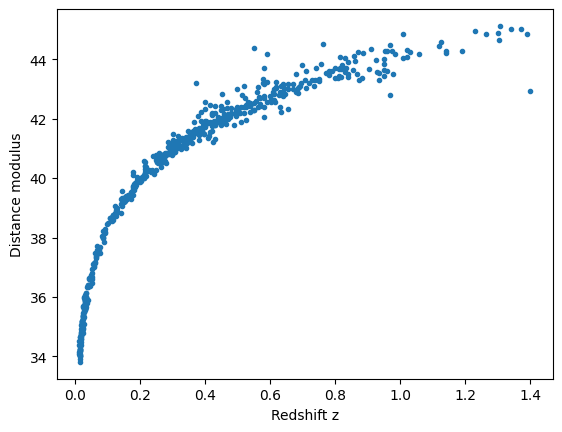

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import random

# Load data
df = pd.read_csv('./sn-data-CW.csv')

# Plot data
plt.figure(1)

plt.plot(df["Redshift"],df["Distance Modulus"],'.')
plt.xlabel("Redshift z")
plt.ylabel("Distance modulus")
#plt.savefig("test-fig.pdf") # save if required

<>:14: SyntaxWarning: invalid escape sequence '\e'
<>:14: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_3733/2949528940.py:14: SyntaxWarning: invalid escape sequence '\e'
  plt.title('Plot of redshift vs Luminosity distance over $\ell$')


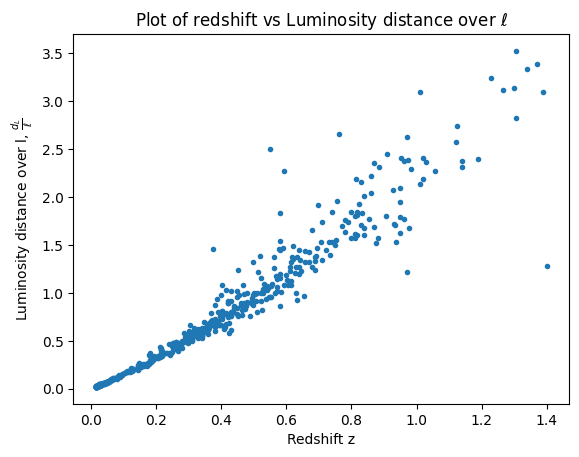

In [ ]:
# We are asked to produce a plot of dL/l as a function of z (the redshift).
import numpy as np
c = 299792458 # speed of light m/s (in a vacuum)
h = 1 # for convenience since it is eliminated anyway
H0 = 0.1*h # m/s pc^-1
l = (c*h)/H0

dL = 10**(df["Distance Modulus"]/5 + 1) 
dL_l = dL/l

plt.plot(df["Redshift"],dL_l,'.');
plt.xlabel("Redshift z")
plt.ylabel(r'Luminosity distance over l, $\frac{d_L}{\ell}$')
plt.title('Plot of redshift vs Luminosity distance over $\ell$')
#plt.savefig("test-fig.pdf") # Save if required

c0 = -0.01489540266501915
c1 = 1.6989327076922247


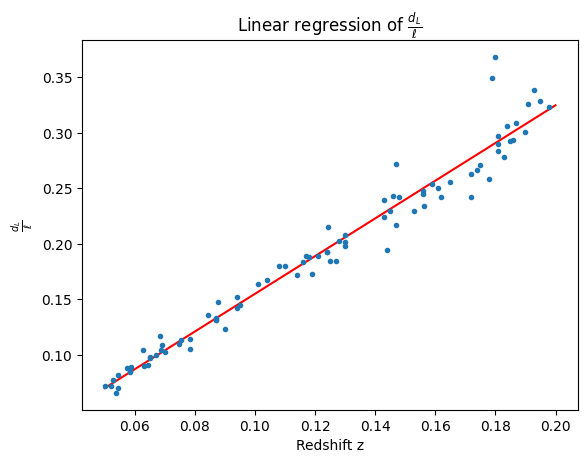

In [ ]:
zupper = 0.2
zlower = 0.05

reds = df.loc[(df["Redshift"] < zupper) & (df["Redshift"] > zlower)]["Redshift"] # values of z the redshift
dist_mod = df.loc[(df["Redshift"] < zupper) & (df["Redshift"] > zlower)]["Distance Modulus"] #values of mu the modulus sistance

# Need to solve the for c0 and c1

sum0 = sum(reds**0)  # alpha
sum1 = sum(reds) # beta
sum2 = sum(reds**2) # gamma

dLi = 10**(dist_mod/5 + 1)
dLi_l = dLi/l

sumd0 = sum(reds**0*dLi_l) # alpha tilda
sumd1 = sum(reds*dLi_l) # beta tilda


det = (sum0*sum2 - sum1**2)**(-1)
# now we have all the components of the matrix and the vector, 
# hence we can workout c0 and c1 by applying the inverse of the matrix.

c0 = det*(sum2*sumd0 - sum1*sumd1)
c1 = det*(-sum1*sumd0 + sum0*sumd1)

def dLl(z):
    return c0 + c1*z

z = np.linspace(0.05, 0.2)
plt.plot(z, dLl(z), color = 'red')
plt.plot(reds,dLi_l,'.');
plt.xlabel("Redshift z")
plt.ylabel(r'$\frac{d_L}{\ell}$')
plt.title(r'Linear regression of $\frac{d_L}{\ell}$')
#plt.savefig("test-fig.pdf")

print('c0 =',c0)
print('c1 =',c1)

highest value, hmax =  0.7137633137755746
lowest value, hmin =  0.6155908120286344


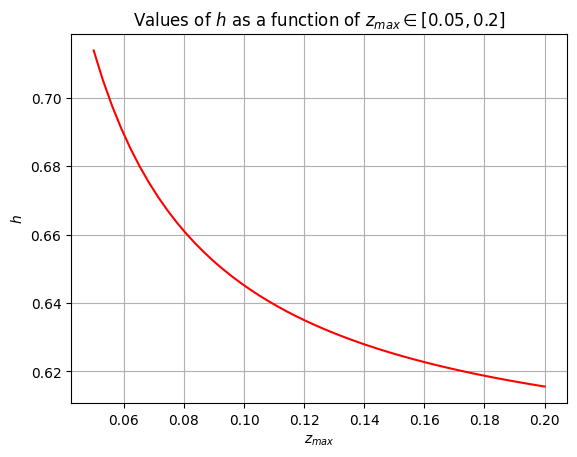

In [8]:
def h_values(zmax):
    return zmax/(c0 + c1*zmax)

zmax = np.linspace(0.05, 0.2)
plt.plot(zmax, h_values(zmax), color = 'red')
plt.xlabel(r'$z_{max}$')
plt.ylabel(r'$h$')
plt.title(r'Values of $h$ as a function of $z_{max} \in [0.05, 0.2]$')
plt.grid()
plt.show
print("highest value, hmax = ", h_values(0.05))
print("lowest value, hmin = ", h_values(0.2))

c0_tilde = 1.0404559922445247
c1_tilde = 0.6855414034883149


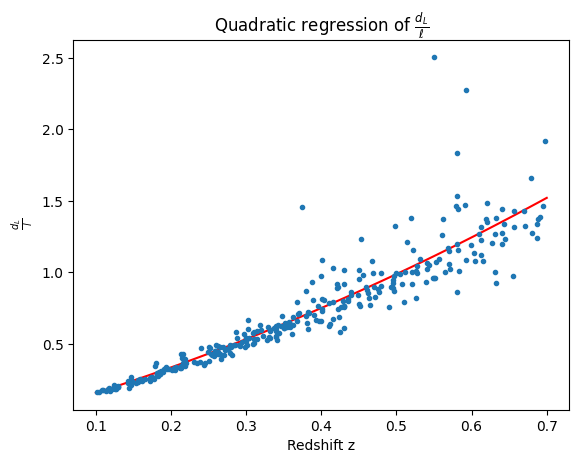

In [ ]:
# perform the following linear regression
zupper = 0.7
zlower = 0.1
h = 0.7

reds = df.loc[(df["Redshift"] < zupper) & (df["Redshift"] > zlower)]["Redshift"] # values of z the redshift
dist_mod = df.loc[(df["Redshift"] < zupper) & (df["Redshift"] > zlower)]["Distance Modulus"] #values of mu the modulus sistance

# Need to solve the for c0 and c1

sum0 = sum(reds)  # alpha
sum1 = sum(reds**2) # beta
sum2 = sum(reds**3) # gamma

dLi = 10**(dist_mod/5 + 1)
dLi_l = dLi/l

sumd0 = sum(reds**0*dLi_l*h) # alpha tilda
sumd1 = sum(reds*dLi_l*h) # beta tilda


det = (sum0*sum2 - sum1**2)**(-1)
# now we have all the components of the matrix and the vector, 
# hence we can workout c0 and c1 by applying the inverse of the matrix.

c0_tilde = det*(sum2*sumd0 - sum1*sumd1)
c1_tilde = det*(-sum1*sumd0 + sum0*sumd1)

def dLl(z):
    return (c0_tilde*z + c1_tilde*z**2)/h

z = np.linspace(0.1, 0.7)
plt.plot(z, dLl(z), color = 'red')
plt.plot(reds,dLi_l,'.');
plt.xlabel("Redshift z")
plt.ylabel(r' $\frac{d_L}{l}$')
plt.title(r'Quadratic regression of $\frac{d_L}{\ell}$')
#plt.savefig("test-fig.pdf")

print('c0_tilde =',c0_tilde)
print('c1_tilde =',c1_tilde)

highest value, q0_max =  -1.1802026518671234
lowest value, q0_min =  -0.48667135624670044


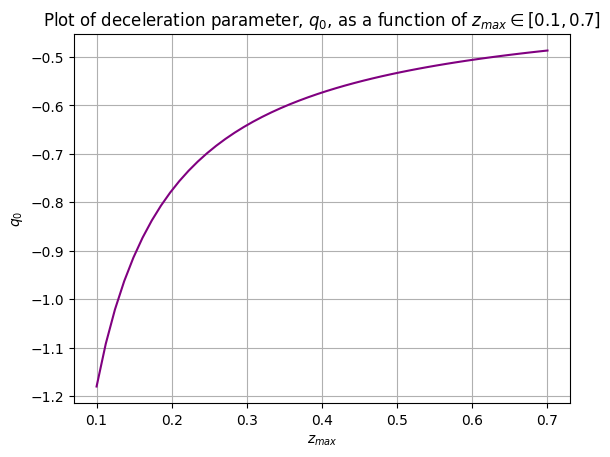

In [10]:
def q0_values(zmax):
    return 1 - 2*((-1+c0_tilde)/zmax + c1_tilde)

zmax = np.linspace(0.1, 0.7)
plt.plot(zmax, q0_values(zmax), color = 'purple')
plt.xlabel(r'$z_{max}$')
plt.ylabel(r'$q_0$')
plt.title(r'Plot of deceleration parameter, $q_0$, as a function of $z_{max} \in[0.1, 0.7]$')
plt.grid()
plt.show
print("highest value, q0_max = ", q0_values(0.1))
print("lowest value, q0_min = ", q0_values(0.7))



Hello world